In [2]:
# plot.ipynb : Vipin Maurya
# jupyter-nbconvert --to pdfviahtml plot.ipynb
import pandas as pd
import pygmt

loc = pd.read_csv('loc.csv')
loc

,Date,Time,Err,RMS,latitude,longitude,Author
0,1934/01/15,08:43:18,NaN,NaN,26.5000,86.5000,GUTE
1,1934/01/15,08:43:25,NaN,NaN,26.6000,86.8000,ISS
2,1934/01/15,08:43:25.39,NaN,NaN,26.7730,86.7620,CENT
3,1934/01/15,08:43:30,NaN,NaN,26.0000,85.5000,CGS
4,1934/01/15,08:43:25.58,0.31,4.105,26.8847,86.5885,ISC
5,1934/01/15,08:43:25.58,NaN,NaN,27.2900,87.1048,NLLoc


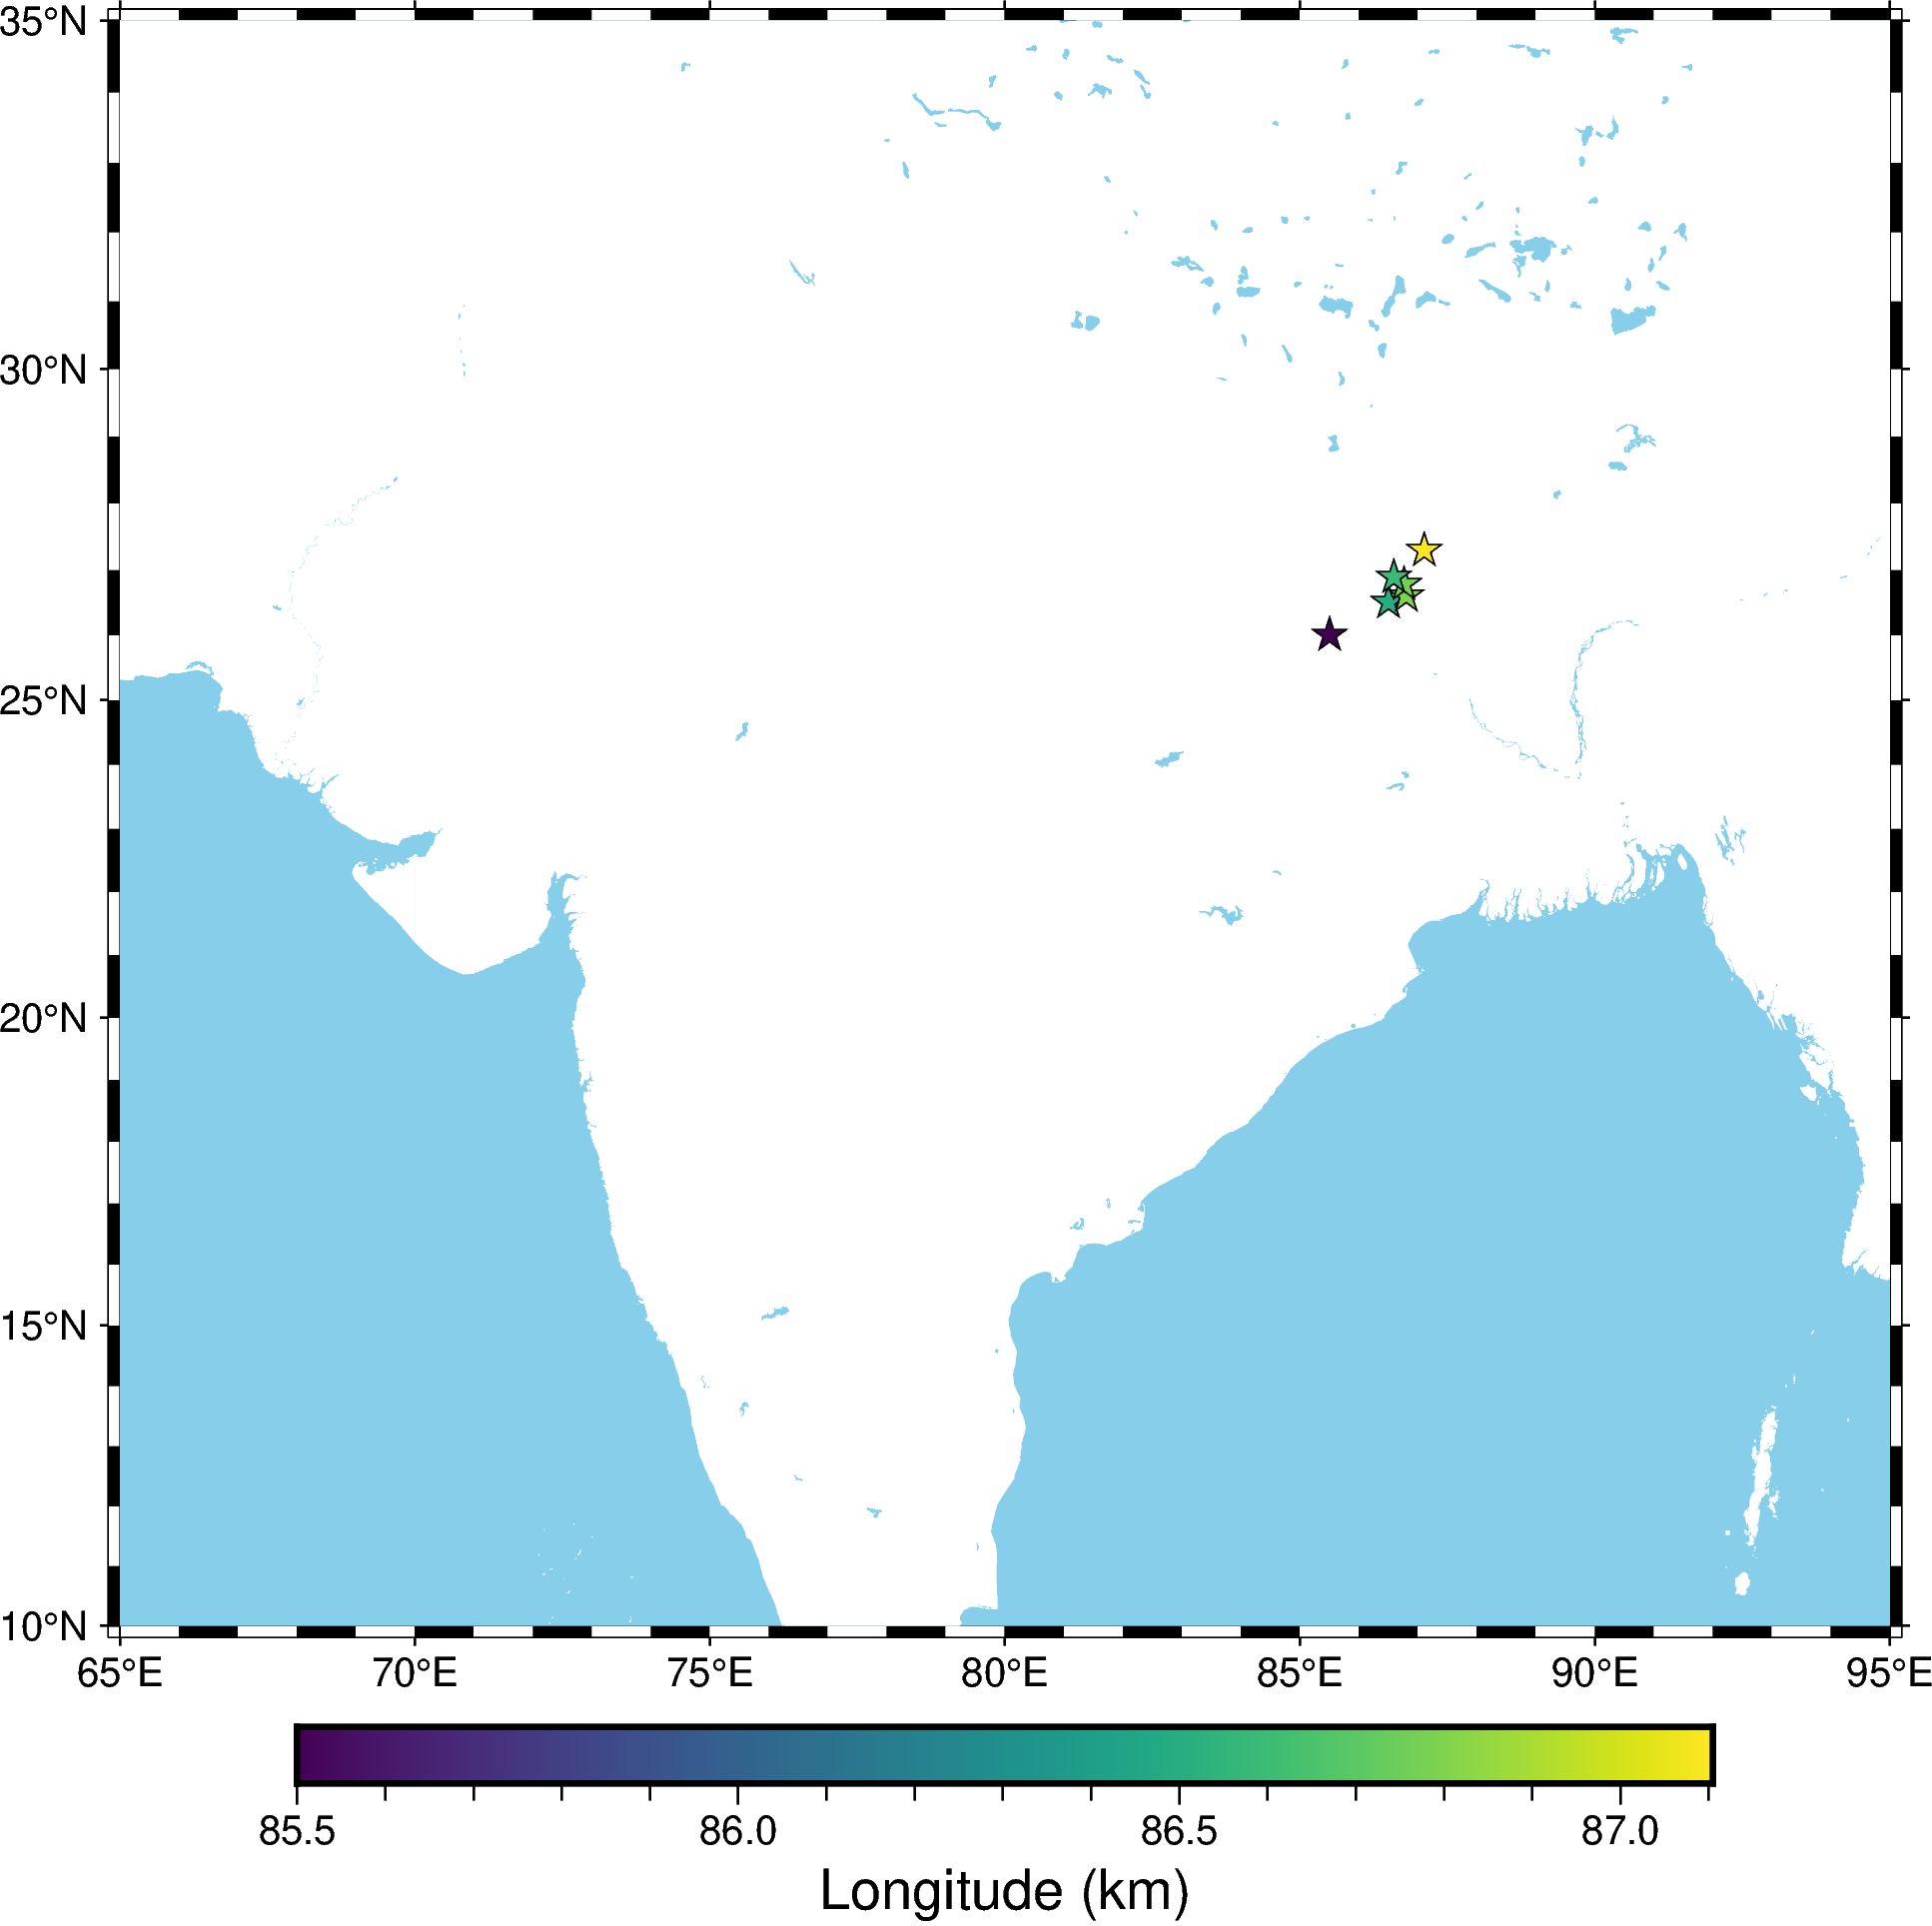

In [3]:
region = [65, 95, 10, 35 ]
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="white", water="skyblue")
pygmt.makecpt(cmap="viridis", series=[loc.longitude.min(), loc.longitude.max()])
fig.plot(
    x=loc.longitude,
    y=loc.latitude,
    color=loc.longitude,
    cmap=True,
    style="a0.3c",
    pen="black"
)
# fig.text(text="NLLoc", x=87.1048, y=27.2900)
fig.colorbar(frame='af+l"Longitude (km)"')
# fig.show(method="external")
fig.show()

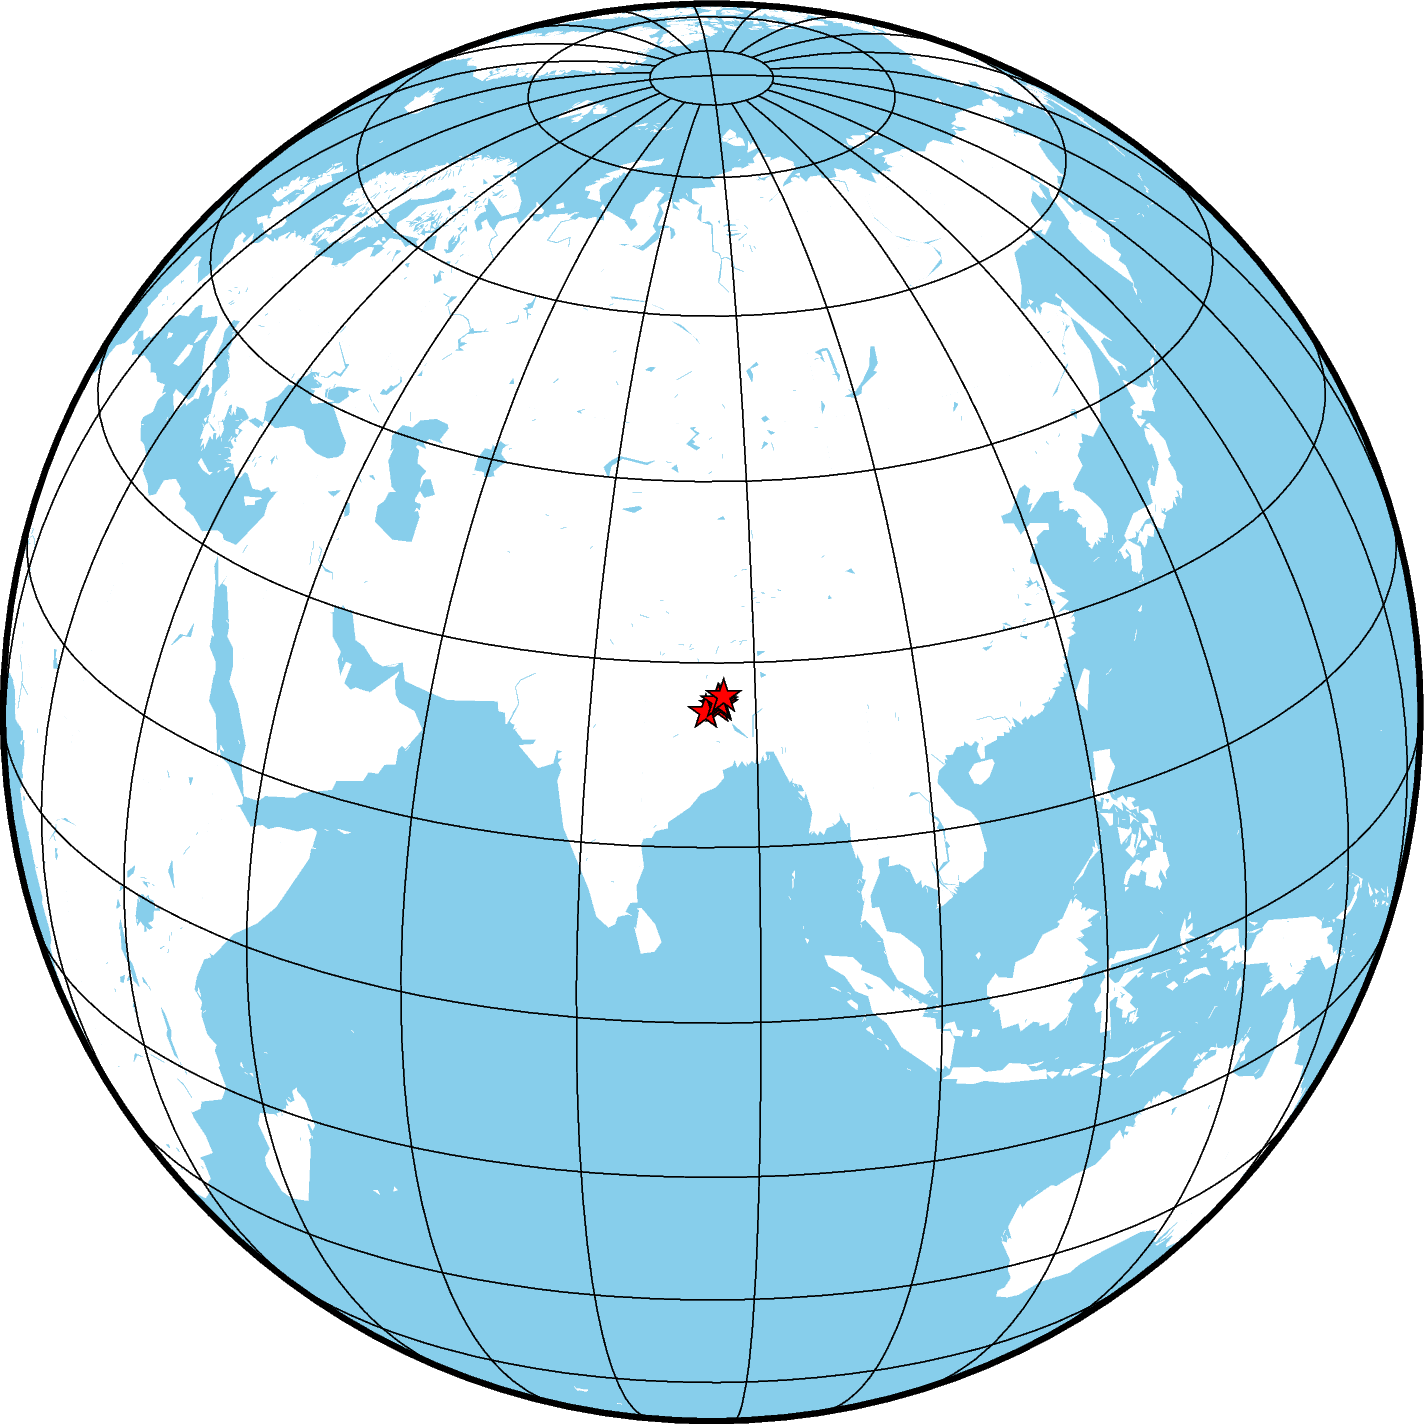

In [4]:
fig = pygmt.Figure()
# Orthographic
fig.coast(projection="G86/26/12c", region="g", frame="g", land="white", water="skyblue")
fig.plot(
    x=loc.longitude,
    y=loc.latitude,
    style="a0.3c",
    color="red",
    pen="black"
)
fig.show()

In [7]:
data = pd.read_csv('data.csv')
data

,Sta,Latitude,Longitude,Elevation,Dist,EvAz,Phase,Time,TRes
0,CAL,22.53917,88.33067,6.0,4.61,159.5,Pn,08:44:18.0,-16.7
1,AGR,27.13330,78.01670,163.0,7.65,273.8,Pn,08:45:10.0,-6.5
2,AGR,27.13330,78.01670,163.0,7.65,273.8,Pb,08:46:10.0,32.0
3,DDI,30.32250,78.05560,682.0,8.24,296.5,Pn,08:45:10.0,-14.8
4,BOM,18.89583,72.81267,6.0,14.97,240.8,Pn,08:46:46.0,-10.7
...,...,...,...,...,...,...,...,...,...
489,LPZ,-16.49530,-68.13270,3658.0,154.38,288.6,M,10:06:06,___
490,LPZ,-16.49530,-68.13270,3658.0,154.38,288.6,M,10:08:00,___
491,LPZ,-16.49530,-68.13270,3658.0,154.38,288.6,M,10:09:03,___
492,LPZ,-16.49530,-68.13270,3658.0,154.38,288.6,M,10:15:08,___


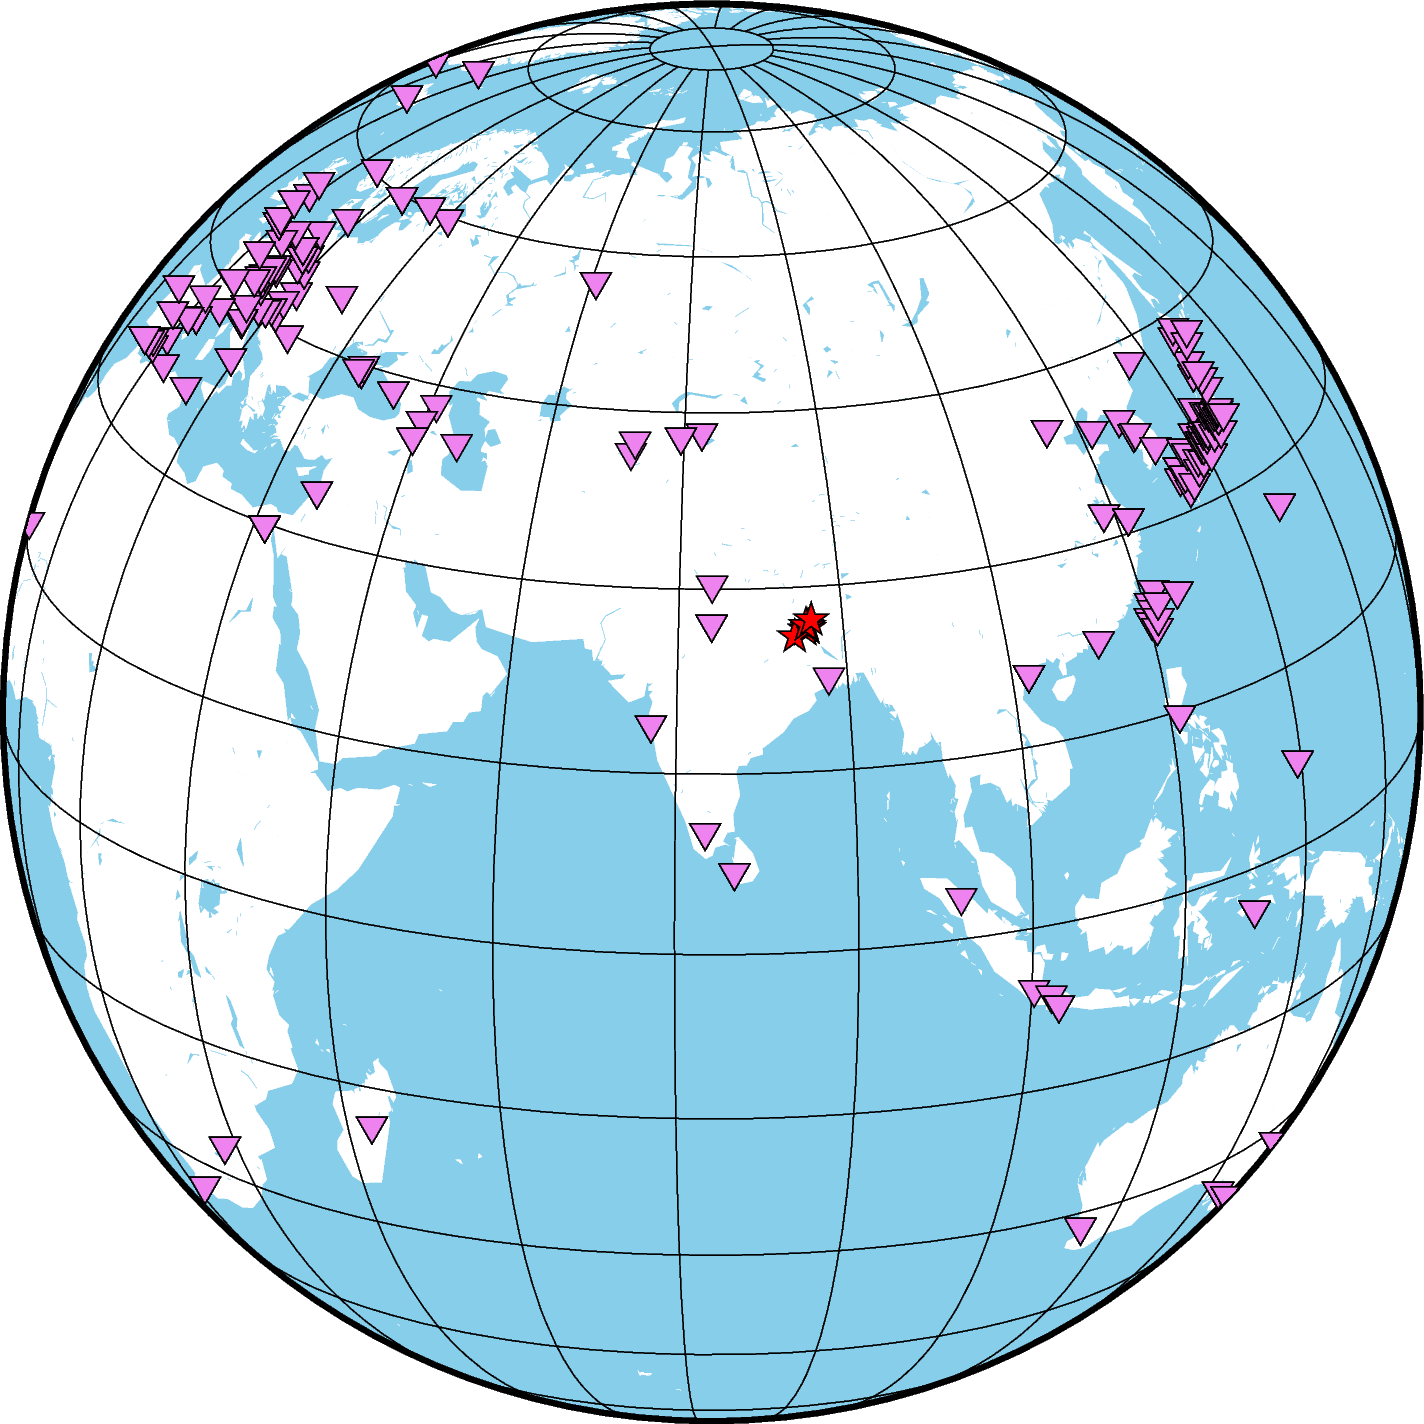

In [8]:
region = [
    data.Longitude.min() - 1,
    data.Longitude.max() + 1,
    data.Latitude.min() - 1,
    data.Latitude.max() + 1,
]
fig = pygmt.Figure()
# Orthographic
# fig.basemap(
# #     # set map limits to theta_min = 0, theta_max = 90, radius_min = 3480,
# #     # radius_max = 6371 (Earth's radius)
#     region=[0, 360, 0, 6371],
# #     region = region,
#     # set map width to 5 cm and interpret input data as geographic azimuth instead
#     # of standard angle, rotate coordinate system counterclockwise by 45 degrees
#     projection="P5c+a+t45",
#     # set the frame and color
#     frame=["xa30f", "ya", "WNse+gbisque"],
# )
fig.coast(projection="G78/20/12c", region="g", frame="g", land="white", water="skyblue")
fig.plot(
    x=loc.longitude,
    y=loc.latitude,
    color="red",
    style="a0.3c",
    pen="black"
)
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    style="i0.3c",
    color="violet",
    pen="black"
)
fig.show()